<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Load-MetaData" data-toc-modified-id="Load-MetaData-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load MetaData</a></span><ul class="toc-item"><li><span><a href="#Load-data-with-qgrid-library" data-toc-modified-id="Load-data-with-qgrid-library-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load data with qgrid library</a></span></li></ul></li><li><span><a href="#Metadata-exploration" data-toc-modified-id="Metadata-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metadata exploration</a></span><ul class="toc-item"><li><span><a href="#Column-descriptions" data-toc-modified-id="Column-descriptions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Column descriptions</a></span></li><li><span><a href="#Check-missing-values" data-toc-modified-id="Check-missing-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Check missing values</a></span></li></ul></li><li><span><a href="#Create-new-metadata-file" data-toc-modified-id="Create-new-metadata-file-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create new metadata file</a></span></li><li><span><a href="#Metadata-correlations" data-toc-modified-id="Metadata-correlations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata correlations</a></span></li><li><span><a href="#Data-engeneering" data-toc-modified-id="Data-engeneering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data engeneering</a></span><ul class="toc-item"><li><span><a href="#Encoding-for-Group" data-toc-modified-id="Encoding-for-Group-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Encoding for Group</a></span></li><li><span><a href="#Encoding-for-Sex" data-toc-modified-id="Encoding-for-Sex-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Encoding for Sex</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Define-Input-and-Ouput" data-toc-modified-id="Define-Input-and-Ouput-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Define Input and Ouput</a></span></li><li><span><a href="#Scale-features-by-standardization-while-preventing-information-leakage-from-the-test-set." data-toc-modified-id="Scale-features-by-standardization-while-preventing-information-leakage-from-the-test-set.-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Scale features by standardization while preventing information leakage from the test set.</a></span></li><li><span><a href="#KNeighborsClassifier-Model" data-toc-modified-id="KNeighborsClassifier-Model-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>KNeighborsClassifier Model</a></span><ul class="toc-item"><li><span><a href="#Make-prediction" data-toc-modified-id="Make-prediction-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Make prediction</a></span></li><li><span><a href="#Show-metrics" data-toc-modified-id="Show-metrics-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Show metrics</a></span></li><li><span><a href="#Confusion-Matrix-&amp;-Accuracy" data-toc-modified-id="Confusion-Matrix-&amp;-Accuracy-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span>Confusion Matrix &amp; Accuracy</a></span></li></ul></li><li><span><a href="#Decision-tree-with-boosting-method" data-toc-modified-id="Decision-tree-with-boosting-method-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Decision tree with boosting method</a></span></li><li><span><a href="#RandomForest-Model" data-toc-modified-id="RandomForest-Model-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>RandomForest Model</a></span></li></ul></li><li><span><a href="#Save-the-best-model" data-toc-modified-id="Save-the-best-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save the best model</a></span></li></ul></div>

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import qgrid
import pickle

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

%matplotlib inline

# Load MetaData

In [2]:
#Import csv with patients informations
data = pd.read_csv('../data/ADNI_data/ADNI1_Annual_2_Yr_3T_8_21_2020.csv', index_col=0)
data.head(5)

,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
Image Data ID,,,,,,,,,,,
I143856,136_S_1227,MCI,F,67,6,MRI,MPR; ; N3; Scaled,Processed,3/23/2009,NiFTI,NaN
I99265,136_S_1227,MCI,F,66,4,MRI,MPR; ; N3; Scaled,Processed,3/06/2008,NiFTI,NaN
I66824,136_S_1227,MCI,F,65,2,MRI,MPR; ; N3; Scaled,Processed,2/21/2007,NiFTI,NaN
I40404,136_S_0579,MCI,F,66,2,MRI,MPR-R; ; N3; Scaled,Processed,7/10/2006,NiFTI,NaN
I119735,136_S_0579,MCI,F,66,2,MRI,MPR-R; ; N3; Scaled_2,Processed,7/10/2006,NiFTI,NaN


## Load data with qgrid library

In [3]:
qgrid_widget = qgrid.show_grid(data, show_toolbar= True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# Metadata exploration

## Column descriptions

In [4]:
data.shape

(306, 11)

In [5]:
#Look at values in specific columns
data.Group.unique()

array(['MCI', 'AD', 'CN'], dtype=object)

In [6]:
data.Subject.value_counts()

023_S_0376    5
023_S_0604    5
023_S_0388    5
053_S_0507    5
067_S_0607    5
             ..
023_S_0926    3
027_S_1387    3
016_S_1326    3
027_S_0404    3
005_S_0324    3
Name: Subject, Length: 89, dtype: int64

There are two subjects that came twice. Not enough to consider them for studyng the evolution of the disease

In [7]:
data.Modality.unique()

array(['MRI'], dtype=object)

In [8]:
data.Visit.unique()

array([6, 4, 2], dtype=int64)

In [9]:
data.Type.unique()

array(['Processed'], dtype=object)

In [10]:
data.Format.unique()

array(['NiFTI'], dtype=object)

## Check missing values

In [11]:
#Check for missing values
data.isnull()

,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
Image Data ID,,,,,,,,,,,
I143856,False,False,False,False,False,False,False,False,False,False,True
I99265,False,False,False,False,False,False,False,False,False,False,True
I66824,False,False,False,False,False,False,False,False,False,False,True
I40404,False,False,False,False,False,False,False,False,False,False,True
I119735,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
I45126,False,False,False,False,False,False,False,False,False,False,True
I64551,False,False,False,False,False,False,False,False,False,False,True
I118675,False,False,False,False,False,False,False,False,False,False,True


In [12]:
sum(data.isnull().values.any(axis=1))

302

# Create new metadata file

In [13]:
#Create a new csv with only usefull columns
adni_patients = data.drop(['Description', 'Type', 'Acq Date', 'Format', 'Downloaded', 'Modality', 'Visit', 'Subject'], axis = 1)
adni_patients.head(5)

,Group,Sex,Age
Image Data ID,,,
I143856,MCI,F,67
I99265,MCI,F,66
I66824,MCI,F,65
I40404,MCI,F,66
I119735,MCI,F,66


# Metadata correlations

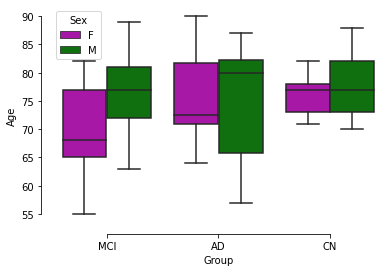

In [14]:
sns.boxplot(x="Group",y= "Age", hue = "Sex", data=adni_patients, palette=["m", "g"])
sns.despine(offset=10, trim=True);

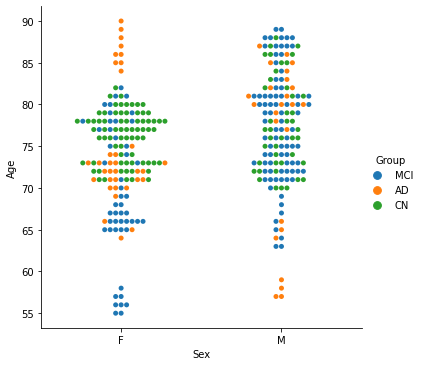

In [15]:
sns.catplot(x="Sex", y="Age", hue="Group", kind="swarm", data=adni_patients)

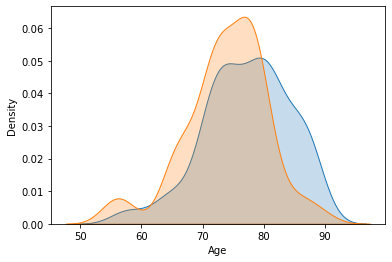

In [16]:
sns.kdeplot(adni_patients.Age[adni_patients.Sex=='M'], label='men', shade=True)
sns.kdeplot(adni_patients.Age[adni_patients.Sex=='F'], label='women', shade=True)
plt.xlabel('Age');

C:\ProgramData\Anaconda3\envs\projet_simplon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


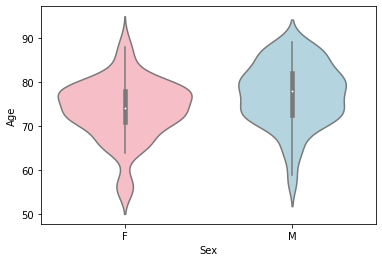

In [17]:
sns.violinplot("Sex", "Age", data=adni_patients,
               palette=["lightpink", "lightblue"]);


Age- Group

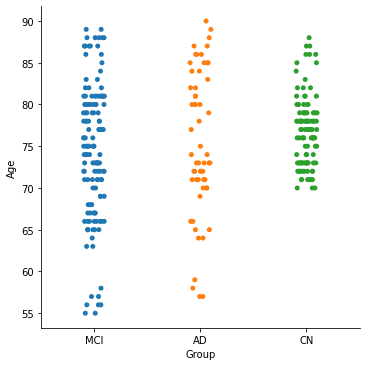

In [18]:
sns.catplot(x="Group", y="Age", data=adni_patients)

<AxesSubplot:xlabel='Group', ylabel='count'>

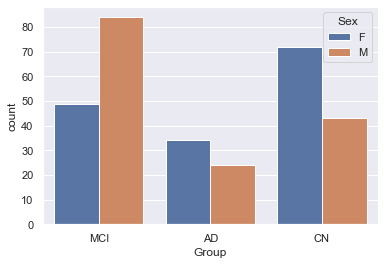

In [19]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Group", hue = "Sex", data=adni_patients)

# Data engeneering

## Encoding for Group

In [20]:
adni_patients["Group"].value_counts()

MCI    133
CN     115
AD      58
Name: Group, dtype: int64

In [21]:
cleanup_nums = {"Group":     {"MCI": 0, "AD": 1, "CN" : 2}}

In [22]:
adni_patients.replace(cleanup_nums, inplace=True)
adni_patients.head()

,Group,Sex,Age
Image Data ID,,,
I143856,0,F,67
I99265,0,F,66
I66824,0,F,65
I40404,0,F,66
I119735,0,F,66


## Encoding for Sex

In [23]:
cleanup_nums_2 = {"Sex":     {"F": 0, "M": 1}}
adni_patients.replace(cleanup_nums_2, inplace=True)
adni_patients.head()

,Group,Sex,Age
Image Data ID,,,
I143856,0,0,67
I99265,0,0,66
I66824,0,0,65
I40404,0,0,66
I119735,0,0,66


# Model

## Define Input and Ouput

In [24]:
y = adni_patients["Group"].values # Output
X = adni_patients.drop('Group', axis = 1).values #Input

In [25]:
print(f'X: {X.shape}. y: {y.shape}')

X: (306, 2). y: (306,)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}. y_test: {y_test.shape}')

x_train: (229, 2). y_train: (229,)
x_test: (77, 2). y_test: (77,)


## Scale features by standardization while preventing information leakage from the test set.

In [29]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

mean_train = x_train.mean()
std_train = x_train.std()
print(f'mean_train: {mean_train}. std_train: {std_train}')

assert np.abs(np.max(mean_train)) < 10**-6
assert np.abs(np.max(std_train - 1)) < 10**-6

mean_train: 2.3658901136116874e-16. std_train: 1.000000000000001


## KNeighborsClassifier Model

In [30]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
train_acc = model.score(x_train, y_train)
test_acc = model.score(x_test, y_test)

print(f'Training accuracy: {train_acc * 100:.2f}%')
print(f'Test accuracy: {test_acc * 100:.2f}%')

Training accuracy: 62.01%
Test accuracy: 53.25%


### Make prediction

In [32]:
y_pred = model.predict(x_test)

### Show metrics

In [33]:
print(f1_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None ))
print(recall_score(y_test, y_pred, average=None))

[0.61538462 0.2962963  0.5483871 ]
[0.71428571 0.25       0.51515152]
[0.54054054 0.36363636 0.5862069 ]


### Confusion Matrix & Accuracy

[[20  2  6]
 [ 6  4  6]
 [11  5 17]]
Accuracy: 53.246753246753244 %


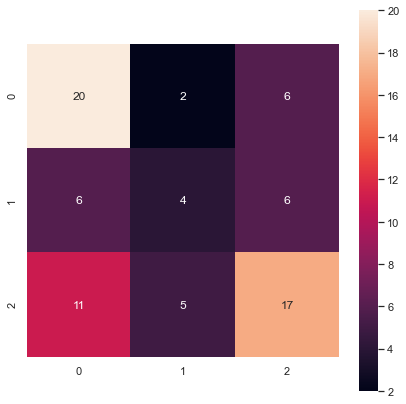

In [34]:
conf_matrix = metrics.confusion_matrix(y_pred, y_test)
print(conf_matrix)
#plt.imshow(conf_matrix, cmap='binary');
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix,square=True, annot=True, fmt='.0f')

print('Accuracy:',metrics.accuracy_score(y_pred, y_test)*100, "%")

## Decision tree with boosting method

In [45]:
from xgboost import XGBClassifier

model_2 = XGBClassifier()
model_2.fit(x_train, y_train)

XGBClassifier(objective='multi:softprob')

In [36]:
y_predict_2 = model_2.predict(x_test)

[[22  2  5]
 [ 3  3  5]
 [12  6 19]]
57.14285714285714 %


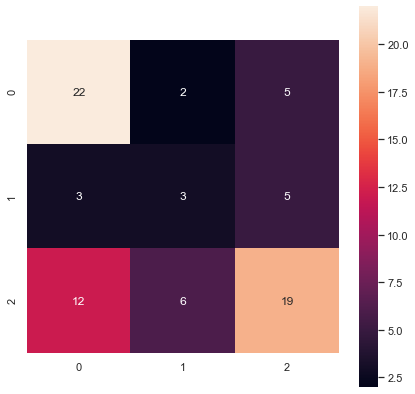

In [39]:
conf_matrix_2 = metrics.confusion_matrix(y_predict_2, y_test)
print(conf_matrix_2)

plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix_2,square=True, annot=True, fmt='.0f')
print(metrics.accuracy_score(y_predict_2, y_test)*100, "%")

## RandomForest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier()
model_3.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
y_predict_3 = model_3.predict(x_test)

[[21  3  6]
 [ 3  3  5]
 [13  5 18]]
54.54545454545454 %


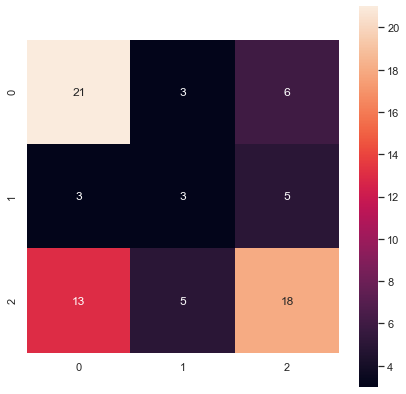

In [43]:
conf_matrix_3 = metrics.confusion_matrix(y_predict_3, y_test)
print(conf_matrix_3)

plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix_3,square=True, annot=True, fmt='.0f')
print(metrics.accuracy_score(y_predict_3, y_test)*100, "%")

# Save the best model

In [46]:
filename = '../models/metadata_model.sav'
pickle.dump(model_2, open(filename, 'wb'))
print ("saving model to disk..")

saving model to disk..
